In [1]:
import collections

import numpy as np
import seaborn as sns; sns.set()

from pan20 import auth
from pan20.auth import tosql
from pan20.util import sqldb; dbi = sqldb.DBInterface()
from pan20.util.sqldb import orm

In [2]:
X, Y = auth.load_small()

In [3]:
tosql.add_all(X, Y, len(X))

In [2]:
X, y = auth.load_small()

In [6]:
counts = collections.Counter()

In [7]:
for y_ in y:
    counts.update(y_['authors'])

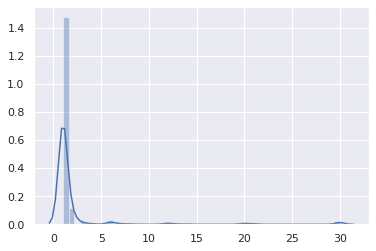

In [10]:
sns.distplot(list(counts.values()))

In [13]:
np.median(list(counts.values()))

1.0

In [15]:
len(counts)

52655

In [17]:
sum(1 for v in counts.values() if v > 5)

3203

In [18]:
authors = [c for c, v in counts.items() if v >= 2]

In [19]:
len(authors)

7634

In [22]:
data = {}
for author in authors:
    data[author] = []
for x, y_ in zip(X, y):
    for j in range(2):
        author = y_['authors'][j]
        if author in authors:
            data[author].append({
                'fandom': x['fandoms'][j],
                'text': x['pair'][j],
            })

In [23]:
len(data)

7634

For each token, we have four lists:
- $a$: abs diff across authors across fandoms
- $b$: abs diff across authors within fandoms
- $c$: abs diff within authors across fandoms
- $d$: abs diff within authors within fandoms

Get as many observations as we can on this from the data. The lists of observations are then used to build distributions for all these measurements for each feature. We then use those distributions for feature selection.

We prioritize features for which

$$
a + b \ \text{is consistently large}
$$

and for which

$$
c + d \ \text{is consistently small}
$$

Probably doesn't even need to be top-k in this case. We can just use these statistics to look for markedness.

In [27]:
100000*100000/1000000

10000.0

In [29]:
X[0]

{'id': '6cced668-6e51-5212-873c-717f2bc91ce6',
 'fandoms': ["Guardians of Ga'Hoole", 'Hetalia - Axis Powers'],
 'pair': ['I shift a bit, warily letting my eyes dart from one owl to the other -- but my eyes are trained on the Barn Owl the most. Like Hoole...so like Hoole... He turns a bit, and our eyes meet directly. I can"t describe it...in this next moment, I don"t look away, how awkward it seems. I stare into his eyes. They"re like Hoole"s... They are Barn Owl eyes, but Hoole"s eyes. They"re his eyes...Hoole"s eyes... They hold that light of valor, justice, that one glow that I always made me feel my gizzard twitch in the bottom of my heart. Hoole... He never wanted me, did he? He loved me, but only who I was pretending to be. He never loved me, only Emerilla...lucky owl. I just wanted to belong -- because I was nothing -- and he gave me that. He was so fair, so kind...he gave me something even Kreeth could not. Mum and Da -- Ygryk and Pleek -- were supposed to be my parents. I was s